In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio


In [6]:
df=pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [9]:
from sklearn.linear_model import LinearRegression

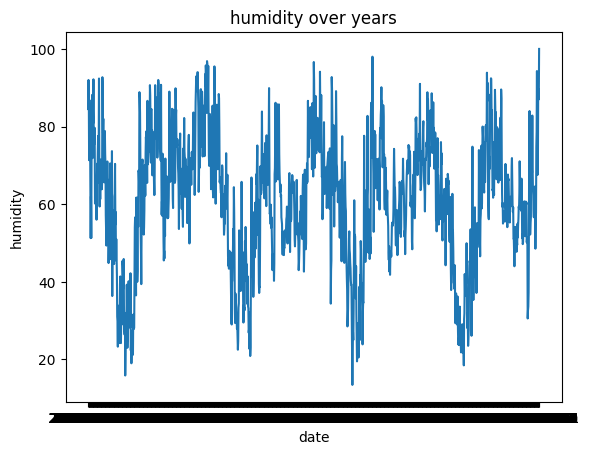

In [10]:
x=df['date']
y=df['humidity']
plt.xlabel("date")
plt.ylabel("humidity")
plt.title('humidity over years')
plt.plot(x,y)
plt.show()

In [11]:
figure=px.line(df,x='date',y="meantemp",title="mean temparatures")
figure.show()

In [12]:
df1=df[["meantemp","humidity","meanpressure"]]

In [13]:
df1.corr()

,meantemp,humidity,meanpressure
meantemp,1.000000,-0.571951,-0.038818
humidity,-0.571951,1.000000,0.001734
meanpressure,-0.038818,0.001734,1.000000


<Axes: >

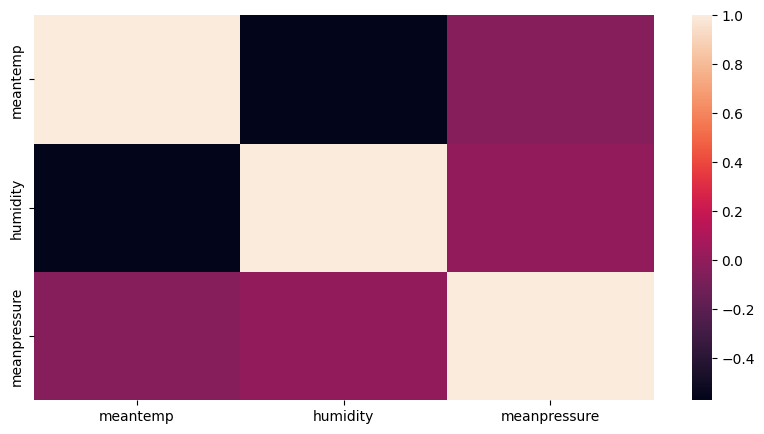

In [14]:
corr=df1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr)

In [15]:
figure=px.line(df,x='date',y="wind_speed",title="mean temparatures")
figure.show()

In [16]:
figure=px.line(df,x="date",y="humidity",title="humidity over years")
figure.show()

In [17]:
figure=px.scatter(df,x="humidity",y="meantemp",size="meantemp",trendline="ols",title="relation between temperature and humidity")
figure.show()

ModuleNotFoundError: No module named 'statsmodels'

In [18]:
df["meantemp"].max()

38.71428571428572

In [19]:
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month
print(df.head())


        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


c:\Users\91814\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\91814\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\91814\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\91814\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\91814\AppData\Local\Program

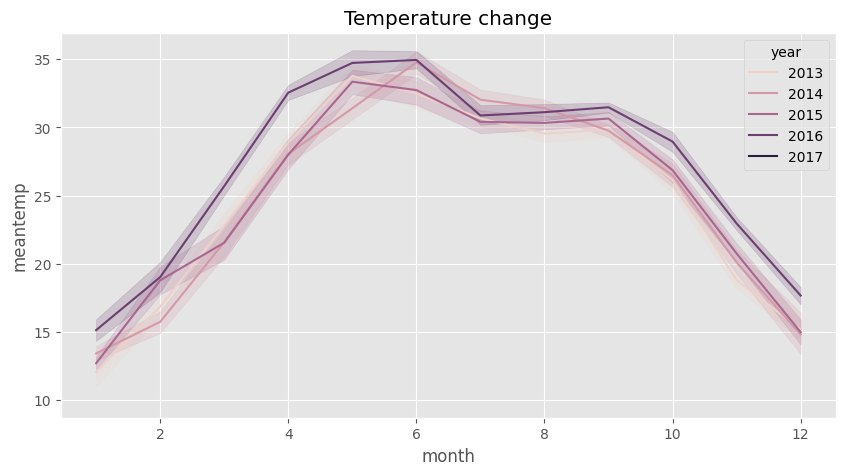

In [20]:
#"ggplot" and "fivethirtyeight" and "seaborn" these are the styles of have their own line styles font size etc
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.title("Temperature change")
sns.lineplot(df,x="month",y="meantemp",hue="year")
plt.show()

In [21]:
#the prophet model accepts time as a "ds" and labels as "y".
forecast=df.rename(columns={"date":"ds","humidity":"y"})
forecast

,ds,meantemp,y,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [23]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast)

forecasts = model.make_future_dataframe(periods=1825)
predictions = model.predict(forecasts)


plot_plotly(model, predictions)

14:50:27 - cmdstanpy - INFO - Chain [1] start processing
14:50:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\91814\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [24]:
forecast=df.rename(columns={"date":"ds","meantemp":"y"})
forecast

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast)

forecasts = model.make_future_dataframe(periods=1825)
predictions = model.predict(forecasts)


plot_plotly(model, predictions)

14:51:57 - cmdstanpy - INFO - Chain [1] start processing
14:51:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\91814\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

